In [52]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import json
from PIL import Image

In [3]:
df_search_parameters_Fibroblasts_Induced_Neurons = pd.read_csv('df_search_parameters_Fibroblasts_Induced_Neurons.csv', index_col =0)

In [4]:
df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling = df_search_parameters_Fibroblasts_Induced_Neurons[df_search_parameters_Fibroblasts_Induced_Neurons['id_folder'] > 220]
df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling.head()

,id_folder,dict_additive_factor,dict_multiplication_factor,average_statistic,average_p_value,mean_synergy,mean_not_synergy,dif_mean
221,221,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 4.11004654338743, 'betweenness': 4.7...",0.050232,2.880055e-24,0.742953,0.753377,0.010423
222,222,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 4.755743221304143, 'betweenness': 5....",0.049155,1.514513e-19,0.734983,0.749100,0.014117
223,223,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 9.051459971534626, 'betweenness': 2....",0.054812,4.512734e-26,0.730094,0.743735,0.013641
224,224,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 7.226894025554261, 'betweenness': 1....",0.055371,6.849017e-27,0.731611,0.744168,0.012557
225,225,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 8.103513956063397, 'betweenness': 7....",0.051869,2.497115e-23,0.726660,0.740831,0.014171


In [5]:
list_metric = ['logFC', 'betweenness', 'pagerank', 'closeness', 'katz', 'hits_authority', 'hits_hub', 'eigenvector',
                   'eigentrust']
coeff_dict = {}
for metric in list_metric:
    coeff_dict['coeff_' + metric] = []
for i in range(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling.shape[0]):
    d = eval(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling.iloc[i,2])
    for metric in list_metric:
        coeff_dict['coeff_' + metric].append(d[metric])
for metric in list_metric: 
    df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['coeff_' + metric] = coeff_dict['coeff_' + metric]

<ipython-input-5-70ba675e8cce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['coeff_' + metric] = coeff_dict['coeff_' + metric]


In [6]:
df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling.head()

,id_folder,dict_additive_factor,dict_multiplication_factor,average_statistic,average_p_value,mean_synergy,mean_not_synergy,dif_mean,coeff_logFC,coeff_betweenness,coeff_pagerank,coeff_closeness,coeff_katz,coeff_hits_authority,coeff_hits_hub,coeff_eigenvector,coeff_eigentrust
221,221,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 4.11004654338743, 'betweenness': 4.7...",0.050232,2.880055e-24,0.742953,0.753377,0.010423,4.110047,4.753198,4.570907,7.482920,2.676342,2.320803,1.831047,3.720993,1.001029
222,222,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 4.755743221304143, 'betweenness': 5....",0.049155,1.514513e-19,0.734983,0.749100,0.014117,4.755743,5.849351,6.028208,4.772751,7.034208,8.903057,1.246488,2.840070,7.166976
223,223,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 9.051459971534626, 'betweenness': 2....",0.054812,4.512734e-26,0.730094,0.743735,0.013641,9.051460,2.263482,1.765398,2.782913,8.887502,3.820818,7.230904,9.714354,8.206701
224,224,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 7.226894025554261, 'betweenness': 1....",0.055371,6.849017e-27,0.731611,0.744168,0.012557,7.226894,1.351493,3.839641,2.528474,5.798488,4.789969,9.621006,1.885122,8.903283
225,225,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 8.103513956063397, 'betweenness': 7....",0.051869,2.497115e-23,0.726660,0.740831,0.014171,8.103514,7.178508,1.929034,8.511631,3.523996,9.899750,7.733491,7.751299,1.164594


Посмотрим на распределения p_value и разницы средних

/home/dinara/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


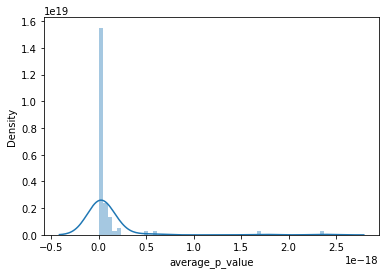

In [7]:
snsplot = sns.distplot(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['average_p_value'])

/home/dinara/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


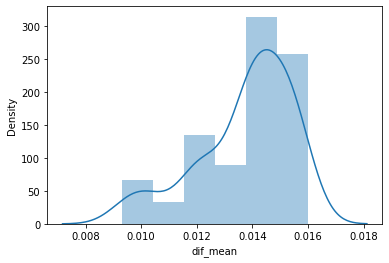

In [8]:
snsplot = sns.distplot(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['dif_mean'])

Нарисовала проекции значений p_value и разницы средних на коэффициенты(они не несут особого смысла, так как все коэффициенты одновременно меняются)

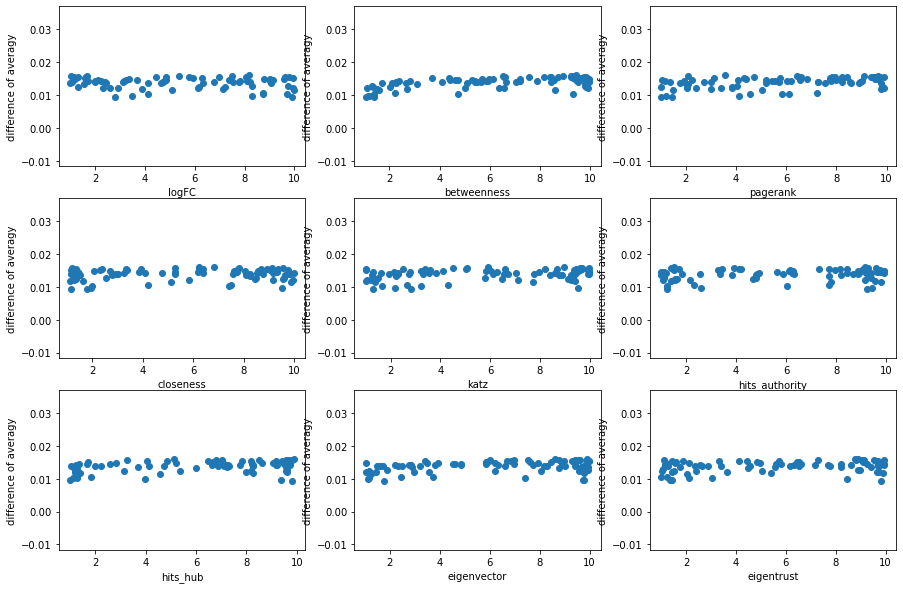

In [9]:
plt.figure(figsize=(15,10))
for (i, metric) in zip(range(1,10), list_metric):
    plt.subplot(3,3,i)
    plt.xlabel(metric)
    plt.ylabel('difference of averagу')
    plt.scatter(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['coeff_' + metric], df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['dif_mean'])

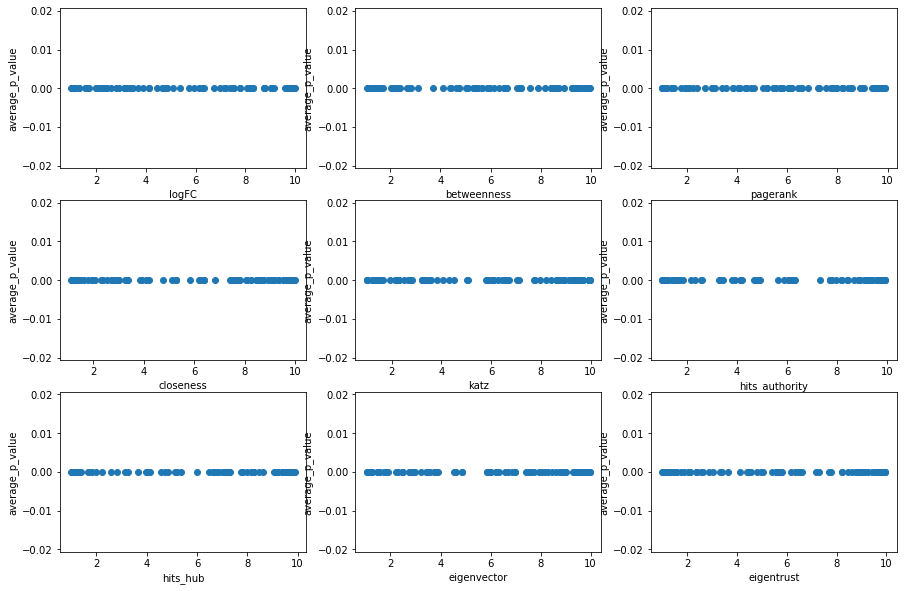

In [11]:
plt.figure(figsize=(15,10))
for (i, metric) in zip(range(1,10), list_metric):
    plt.subplot(3,3,i)
    plt.xlabel(metric)
    plt.ylabel('average_p_value')
    plt.scatter(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['coeff_' + metric], df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['average_p_value'])

In [12]:
print('максимальное значение average pvalue: {}'.format(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['average_p_value'].max()))

максимальное значение average pvalue: 2.3772731341677088e-18


# Посмотрим на значения коэффициентов и построим распределение, соответствующих максимуму .

In [13]:
with open("Validation_results_Fibroblasts_Induced_Neurons/Validation_results_Fibroblasts_Induced_Neurons_9_metrics/_max_bayes_Fibroblasts_Induced_Neurons.json", "r") as read_file:
    max_res = json.load(read_file)

In [73]:
max_res

{'target': 0.01598290454469009,
 'params': {'coeff_betweenness': 9.460967341000304,
  'coeff_closeness': 6.238127619523721,
  'coeff_eigentrust': 8.909487859706598,
  'coeff_eigenvector': 8.602610008529997,
  'coeff_hits_authority': 9.148530868377843,
  'coeff_hits_hub': 5.138922392351263,
  'coeff_katz': 5.917121344183359,
  'coeff_logFC': 8.187432320368355,
  'coeff_pagerank': 3.571469665607328}}

In [16]:
id_max = int(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling[df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['dif_mean'] == max_res['target']]['id_folder'])
print(id_max)

246


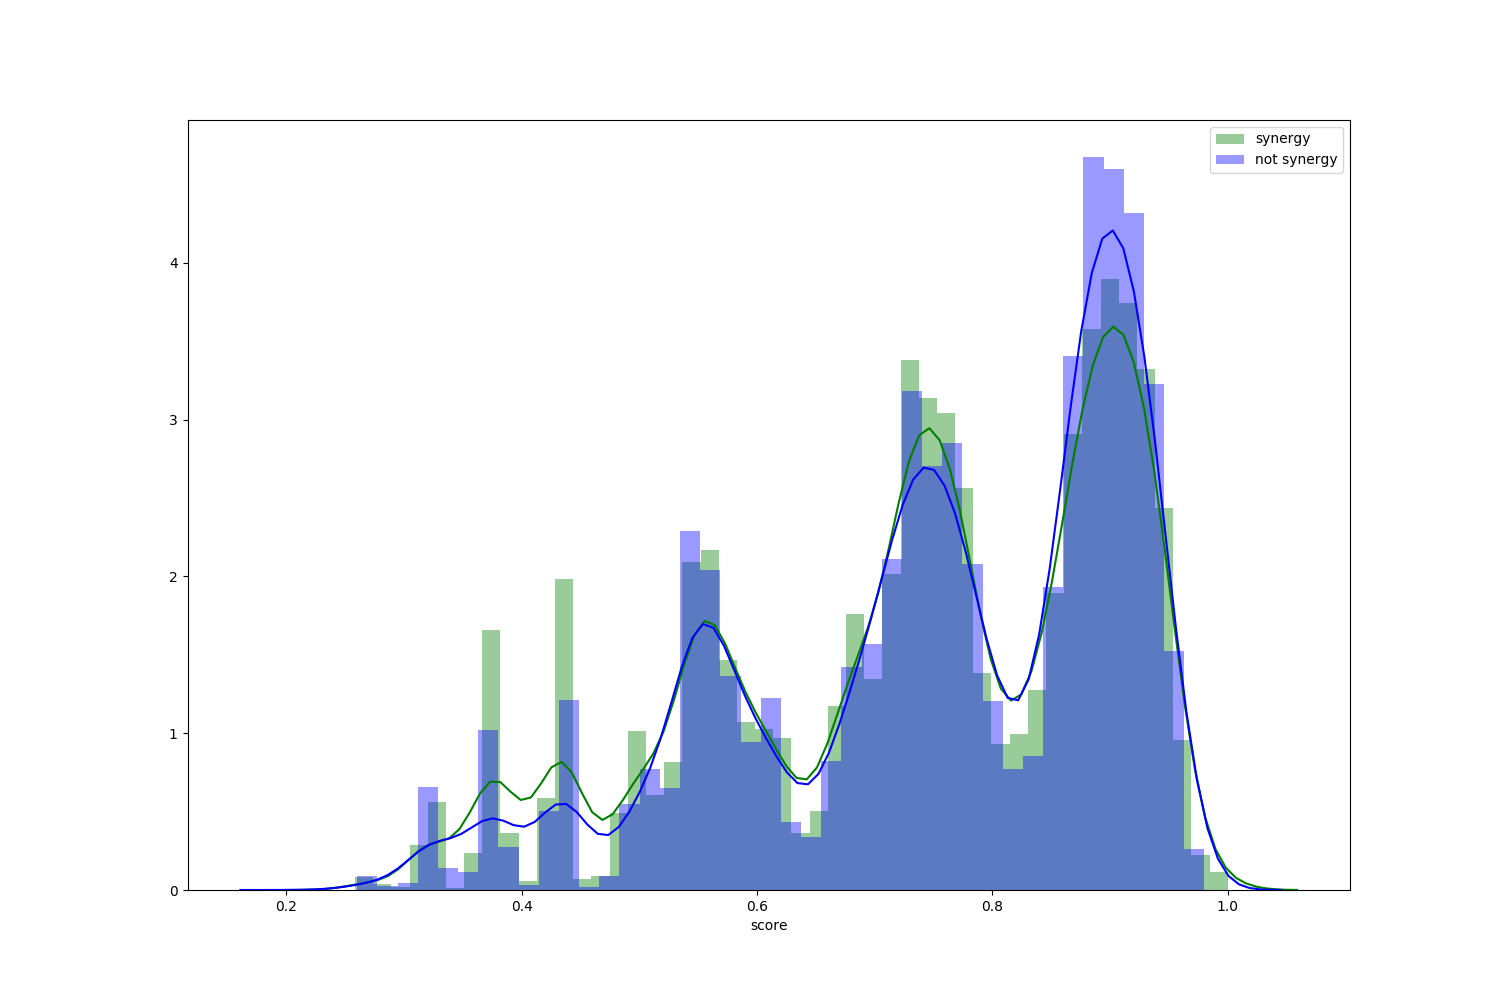

In [28]:
img = Image('Validation_results_Fibroblasts_Induced_Neurons/Validation_results_Fibroblasts_Induced_Neurons_9_metrics/fig_Fibroblasts_Induced_Neurons_' + str(id_max) + '.png')
display(img)

Посмотрим какие распределения получались.

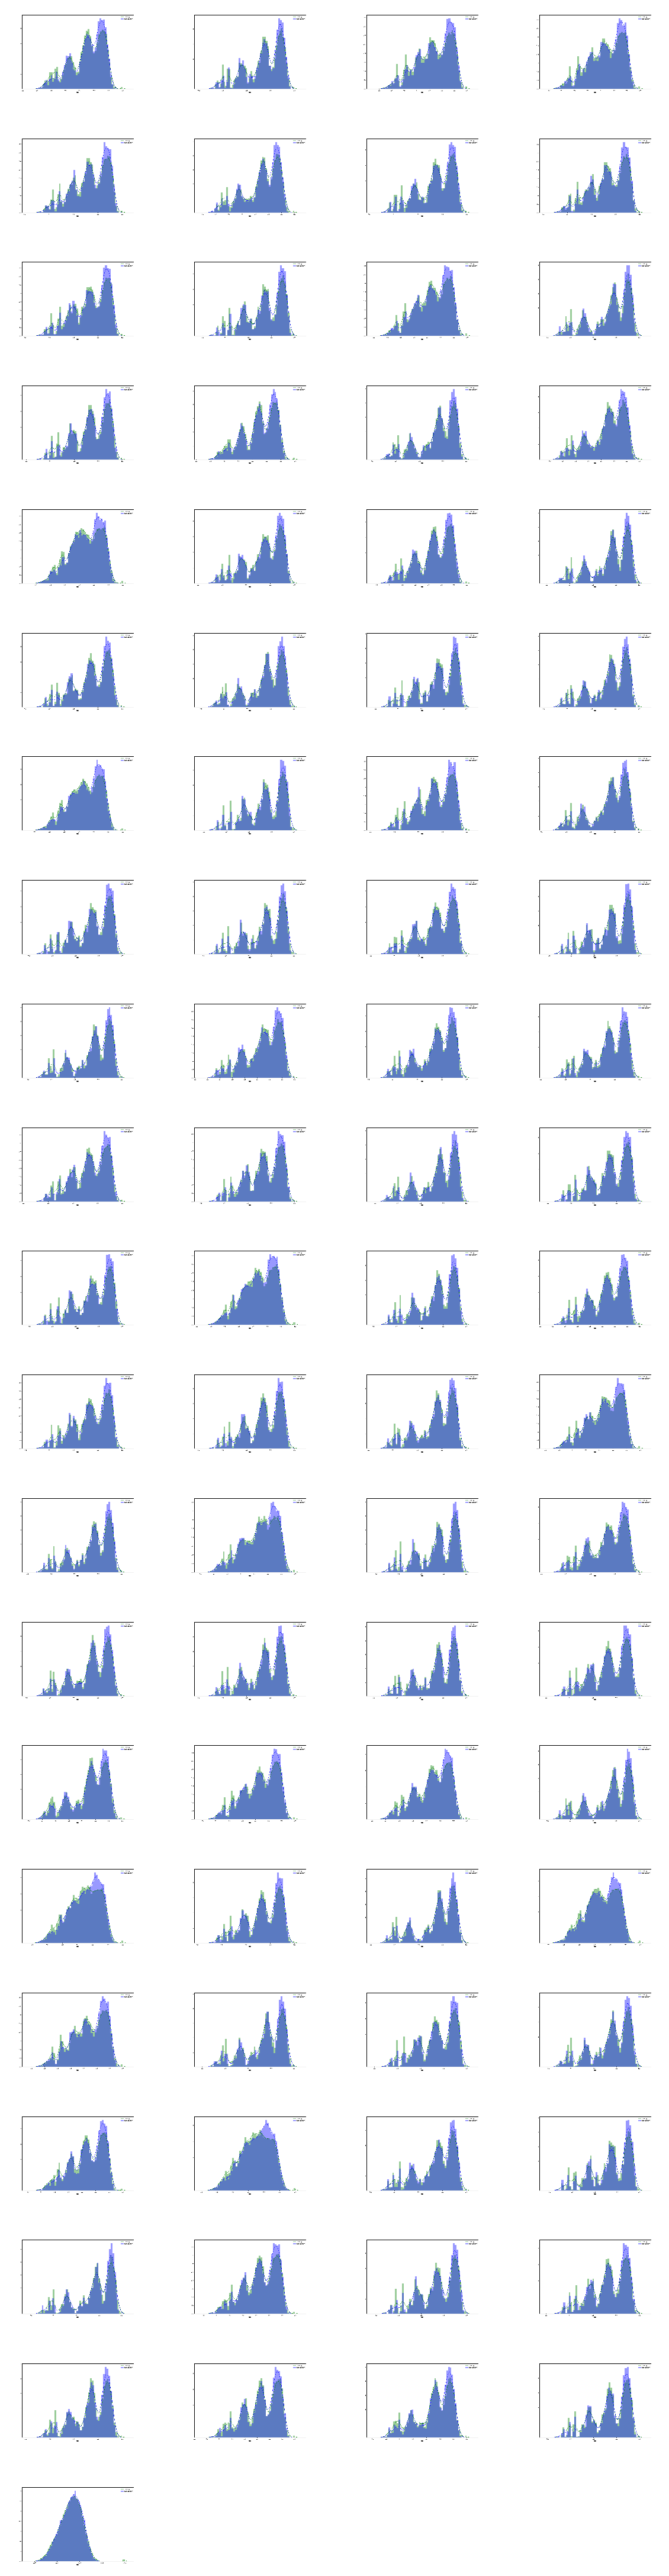

In [72]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

fig = figure( figsize=(20, 80))
col = 4
number_of_images = 81
row = number_of_images/col
if (number_of_images%col != 0):
    row += 1
for i in range(number_of_images):
    a=fig.add_subplot(row,col,i+1)
    image = imread('Validation_results_Fibroblasts_Induced_Neurons/Validation_results_Fibroblasts_Induced_Neurons_9_metrics/fig_Fibroblasts_Induced_Neurons_' + str(i + 221) + '.png')
    imshow(image)
    axis('off')
